In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

In [66]:
df = pd.read_csv('../data/df_simple_model.csv')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15747 entries, 0 to 15746
Columns: 1447 entries, Age to PositionCategory_Sturm
dtypes: float64(5), int64(1442)
memory usage: 173.8 MB


In [68]:
# X und y festlegen
y = df["Value"]
X = df.drop("Value", axis = 1)

In [79]:
# Kopiert aus TreesForestsEnsembles.ipynb
def plot_variable_importance(model, X_train, n):
    imp = DataFrame({"imp": model.feature_importances_, "names": X_train.columns})
    imp = imp.sort_values("imp", ascending=True).tail(n)  # Select the top n rows
    fig, ax = plt.subplots(figsize=(imp.shape[0] / 2, imp.shape[0] / 2))  # Adjusted size for fewer variables
    ax.barh(imp["names"], imp["imp"], color="green")
    ax.set_xlabel('\nVariable Importance')
    ax.set_ylabel('Features\n')
    ax.set_title('Top ' + str(n) + ' Variable Importance Plot\n')
    plt.show()

In [70]:
# Import Functions
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Instantiate Model
model = XGBRegressor()

# fit model
model.fit(X, y)

#make prediction
y_pred = model.predict(X)

# Evaluate Model Performance
mean_squared_error(y, y_pred, squared=False)

1482976.898052275

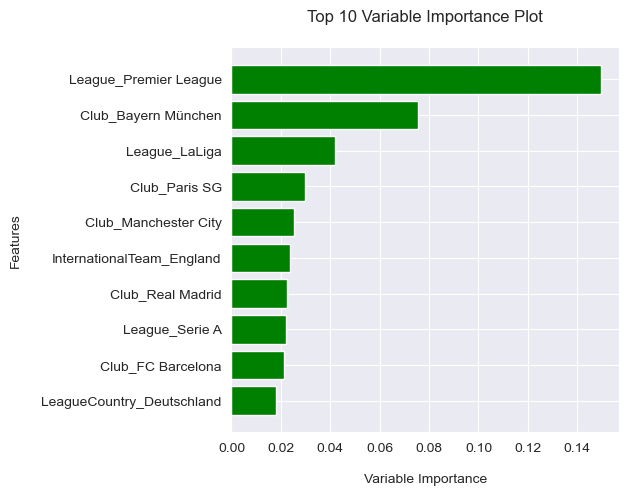

In [80]:
plot_variable_importance(model, X, 10)